In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#Absenteeism at work Data Set

https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#

*Source:*

Creators original owner and donors: Andrea Martiniano (1), Ricardo Pinto Ferreira (2), and Renato Jose Sassi (3).

E-mail address:
andrea.martiniano'@'gmail.com (1) - PhD student;
log.kasparov'@'gmail.com (2) - PhD student;
sassi'@'uni9.pro.br (3) - Prof. Doctor.

Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.

*Attribute Information:*
1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours

In [6]:
poblacion =  pd.read_csv ('/content/Absenteeism_at_work.csv', sep=';')

In [75]:
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [7]:
poblacion.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


No handles with labels found to put in legend.


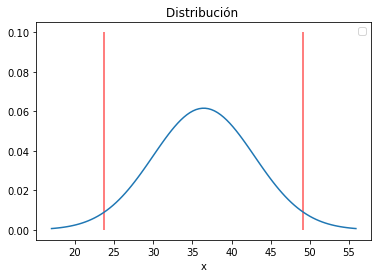

In [12]:
# Instanciar Distribucion
mu = 36.450000
sigma = 6.478772
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
# Agregar estilo
plt.vlines( mu +1.96*sigma, 0, 0.1, colors='r', lw=2, alpha=0.5)
plt.vlines( mu -1.96*sigma, 0, 0.1, colors='r', lw=2, alpha=0.5)

plt.title("Distribución ")
plt.xlabel("x")
plt.legend()
plt.show()


N=740
alpha=0.95
error=0.05

Desired confidence level	z-score
80%     1.28
85%     1.44
90%     1.65
95%     1.96
99%     2.58

N=254

Conseguido a través de: https://www.surveymonkey.com/mp/sample-size-calculator/

In [9]:
muestra=poblacion.sample(n =254 ) 
muestra.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,18.102362,18.574803,6.228346,3.858268,2.590551,218.165354,30.240157,12.661417,36.417323,271.608720,94.681102,0.051181,1.307087,1.015748,0.559055,0.070866,0.700787,78.291339,172.204724,26.381890,7.098425
std,10.853195,8.655022,3.474785,1.454036,1.109459,66.617160,15.121687,4.470758,6.506234,37.952522,3.788462,0.220802,0.683074,1.135028,0.497481,0.257108,1.249917,13.043018,6.049648,4.218328,13.241231
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,2.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,67.000000,169.000000,23.000000,2.000000
50%,19.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,12.500000,37.000000,264.810500,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,171.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,17.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [10]:
muestra2=poblacion.sample(n =260 ) 
muestra2.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,17.765385,20.415385,6.453846,3.838462,2.530769,223.084615,30.165385,12.838462,36.738462,273.030892,94.426923,0.038462,1.230769,1.161538,0.634615,0.065385,0.730769,80.584615,172.492308,27.096154,7.807692
std,11.097095,7.824607,3.391134,1.456201,1.126641,68.263348,15.225447,4.220384,6.327673,41.729485,3.879265,0.192679,0.615607,1.171105,0.482467,0.247680,1.287231,12.873777,6.948510,4.204519,13.578086
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,28.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,15.750000,3.000000,3.000000,2.000000,179.000000,16.000000,10.000000,32.000000,241.476000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,17.500000,23.000000,7.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,26.000000,3.000000
75%,28.000000,27.000000,9.250000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,296.309000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Dispersión con muestra N=500

In [109]:
N_muestra= 500
mediasmuestras = []
for i in range(1000):
    muestra_p = poblacion.sample(n =N_muestra ) 
    mediasmuestras.append(muestra_p.Age.values.mean())

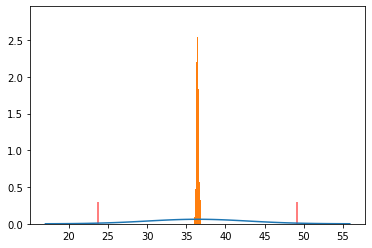

In [110]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(mediasmuestras, bins=50,density=True)
plt.vlines( mu +1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)
plt.vlines( mu -1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)

Dispersión con muestra N=254

In [91]:
N_muestra= 254
mediasmuestras = []
for i in range(1000):
    muestra_p = poblacion.sample(n =N_muestra ) 
    mediasmuestras.append(muestra_p.Age.values.mean())

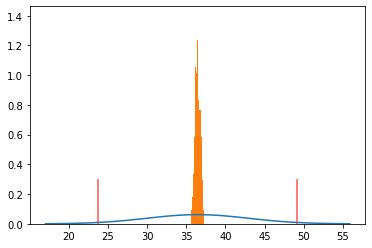

In [92]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(mediasmuestras, bins=50,density=True)
plt.vlines( mu +1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)
plt.vlines( mu -1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)


Dispersión con muestra N=5

In [107]:
N_muestra= 5
mediasmuestras = []
for i in range(1000):
    muestra_p = poblacion.sample(n =N_muestra ) 
    mediasmuestras.append(muestra_p.Age.values.mean())

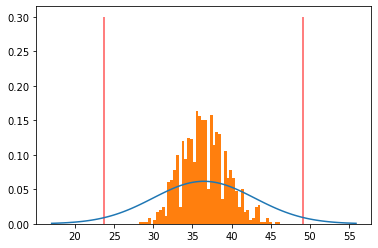

In [108]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(mediasmuestras, bins=50,density=True)
plt.vlines( mu +1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)
plt.vlines( mu -1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)

In [ ]:
#Al ser menor el tamaño de la muestra, menos coincide con la media de la población "real"

In [19]:
import seaborn as sns

Gráfico Boxplot

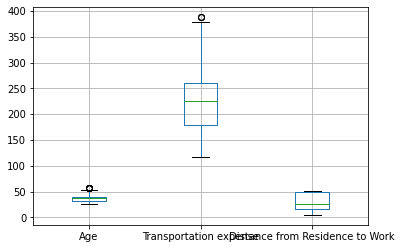

In [77]:

boxplot = poblacion.boxplot(column=['Age', 'Transportation expense', 'Distance from Residence to Work'])

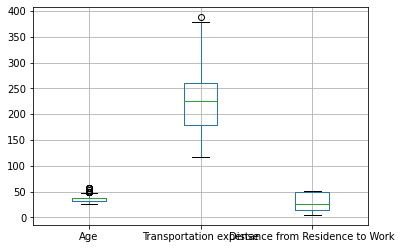

In [23]:

boxplot = muestra_p.boxplot(column=['Age', 'Transportation expense', 'Distance from Residence to Work'])

In [ ]:
#En los boxplots se observan más outliers en la muestra que en la población

Dispersión datos
Variables: Distancia hogar-trabajo; Costo de Transporte

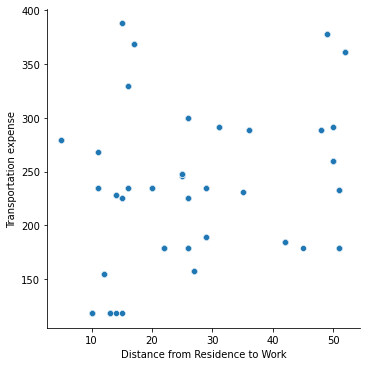

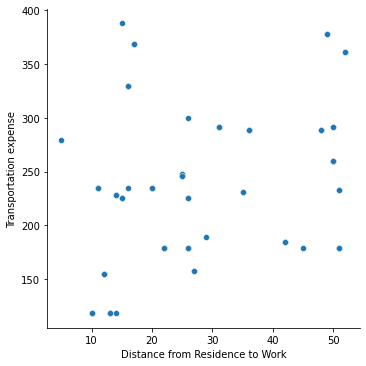

In [25]:
sns.relplot(x="Distance from Residence to Work", y="Transportation expense", data=poblacion);
sns.relplot(x="Distance from Residence to Work", y="Transportation expense", data=muestra_p);

In [37]:
#No se ve mucha relación entre la Distancia hogar-trabajo con la variable de Gasto de Transporte.
#Es probable que  otras variables influyan en el costo de transporte: medio (automóvil propio, taxi, bus), tráfico

Comparación Histogramas de población (azul) y muestra (naranja)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia')

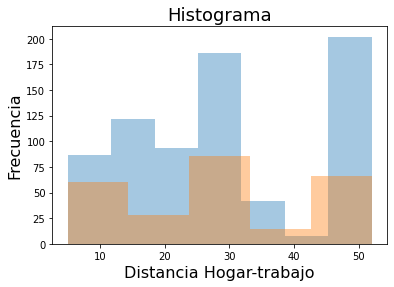

In [81]:
sns.distplot(poblacion["Distance from Residence to Work"], kde=False)
sns.distplot(muestra_p["Distance from Residence to Work"] ,kde=False)
plt.title('Histograma', fontsize=18)
plt.xlabel('Distancia Hogar-trabajo', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia')

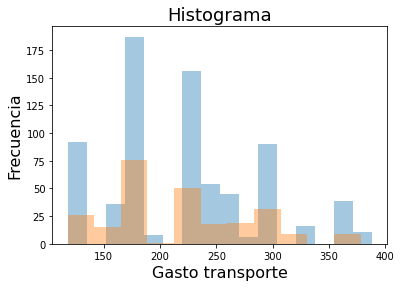

In [106]:
sns.distplot(poblacion["Transportation expense"], kde=False)
sns.distplot(muestra_p["Transportation expense"] ,kde=False)
plt.title('Histograma', fontsize=18)
plt.xlabel('Gasto transporte', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia')

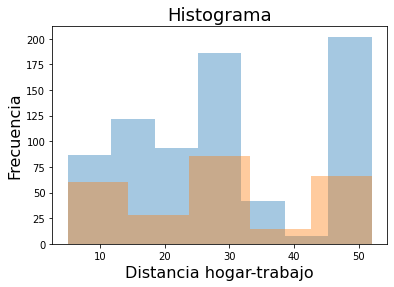

In [83]:
sns.distplot(poblacion["Distance from Residence to Work"], kde=False)
sns.distplot(muestra_p["Distance from Residence to Work"] ,kde=False)
plt.title('Histograma', fontsize=18)
plt.xlabel('Distancia hogar-trabajo', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

In [113]:
from scipy import stats

Prueba de Hipótesis entre la muestra y la población

Variable: Distancia hogar-trabajo

In [116]:
stats.ks_2samp(poblacion['Distance from Residence to Work'], muestra['Distance from Residence to Work'])

Ks_2sampResult(statistic=0.051723771015109596, pvalue=0.6683801062087128)

In [ ]:
#No se rechaza la Hipótesis nula (p value > 0.05). La muestra es consistente con la población

Prueba de Hipótesis entre dos muestras

Variable: Distancia hogar-trabajo

In [11]:
stats.ks_2samp(muestra2['Distance from Residence to Work'], muestra['Distance from Residence to Work'])

Ks_2sampResult(statistic=0.027892186553603877, pvalue=0.9998741702176606)

In [ ]:
#No se rechaza la Hipótesis nula (p value > 0.05). La muestras vienen de una misma distribución continua

Prueba de Hipótesis_ Normalidad

Variable: Distancia hogar-trabajo

In [118]:
stats.kstest(poblacion['Distance from Residence to Work'], 'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

In [ ]:
#Se rechaza la Hipótesis nula (p value <  0.05). No sigue una distribución normal